# Tâche 6 
- François Clinquart 
- NOMA : 59602100
- LMAPR1492 Physique des matéraiux 

## importation des modules nécessaires 

In [14]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
## IMPORTATION IMPORTANTE
from pymatgen.analysis.diffraction.xrd import XRDCalculator

# Mon Matériaux - le ScSnAu
Il s'agit d'un Cristal cubique de groupe ponctuel : -43m

In [15]:
mp_key = "ER5V8i0JUw7k31Nk5IpkvogP61BDz9cw"
mp_id = "mp-2894" #ScSnAu

In [16]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    
spacegroup_analyzer = SpacegroupAnalyzer(prim_struc)
conv_struc = spacegroup_analyzer.get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# le Délivrable
déterminer les 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å

In [17]:
# Génère le motif de diffraction aux rayons X d'une structure cristalline par un rayonnemnt incident Cukalpha 
##de longeur d'onde 1.54060 A
calculateur_xrd = XRDCalculator('CuKa', 1.54060)

In [25]:
# Calcule le motif de diffraction pour une structure donnée
xrd = calculateur_xrd.get_pattern(prim_struc)

x = 100

In [26]:
print(x*"*")
print(x*"_")
print("1er pic de diffraction :")
print("Indices hkl : ", xrd.hkls[0])
print("Intensité = ", xrd.y[0])  
print(x*"_")
print("Angle 2\u03B8 (degrés) = ", xrd.x[0], "°")
print("Distance interplanaire = ", xrd.d_hkls[0])

print(x*"_")
print(x*"*")

****************************************************************************************************
____________________________________________________________________________________________________
1er pic de diffraction :
Indices hkl :  [{'hkl': (1, 1, 1), 'multiplicity': 8}]
Intensité =  81.43691594262549
____________________________________________________________________________________________________
Angle 2θ (degrés) =  23.81311093593367 °
Distance interplanaire =  3.7365956985196513
____________________________________________________________________________________________________
****************************************************************************************************


In [27]:
print(x*"*")

print(x*"_")
print("2ieme pic de diffraction :")
print("Indices hkl correspondants : ", xrd.hkls[1])
print("Intensité = ", xrd.y[1])
print(x*"_")
print("Angle 2\u03B8 (degrés) = ", xrd.x[1], "°")
print("Distance interplanaire = ", xrd.d_hkls[1])

print(x*"_")
print(x*"*")

****************************************************************************************************
____________________________________________________________________________________________________
2ieme pic de diffraction :
Indices hkl correspondants :  [{'hkl': (2, 0, 0), 'multiplicity': 6}]
Intensité =  0.8719799517153869
____________________________________________________________________________________________________
Angle 2θ (degrés) =  27.56459024571552 °
Distance interplanaire =  3.235986798589677
____________________________________________________________________________________________________
****************************************************************************************************


In [28]:
print(x*"*")
print(x*"_")
print("3ieme pic de diffraction :")
print("Indices hkl correspondants : ", xrd.hkls[2])
print("Intensité = ", motif.y[2])
print(x*"_")
print("Angle 2\u03B8 (degrés) = ", xrd.x[2], "°")
print("Distance interplanaire = ", xrd.d_hkls[2])
print(x*"_")
print(x*"*")

****************************************************************************************************
____________________________________________________________________________________________________
3ieme pic de diffraction :
Indices hkl correspondants :  [{'hkl': (2, 2, 0), 'multiplicity': 12}]
Intensité =  100.0
____________________________________________________________________________________________________
Angle 2θ (degrés) =  39.37779825920974 °
Distance interplanaire =  2.2881882091129073
____________________________________________________________________________________________________
****************************************************************************************************


<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

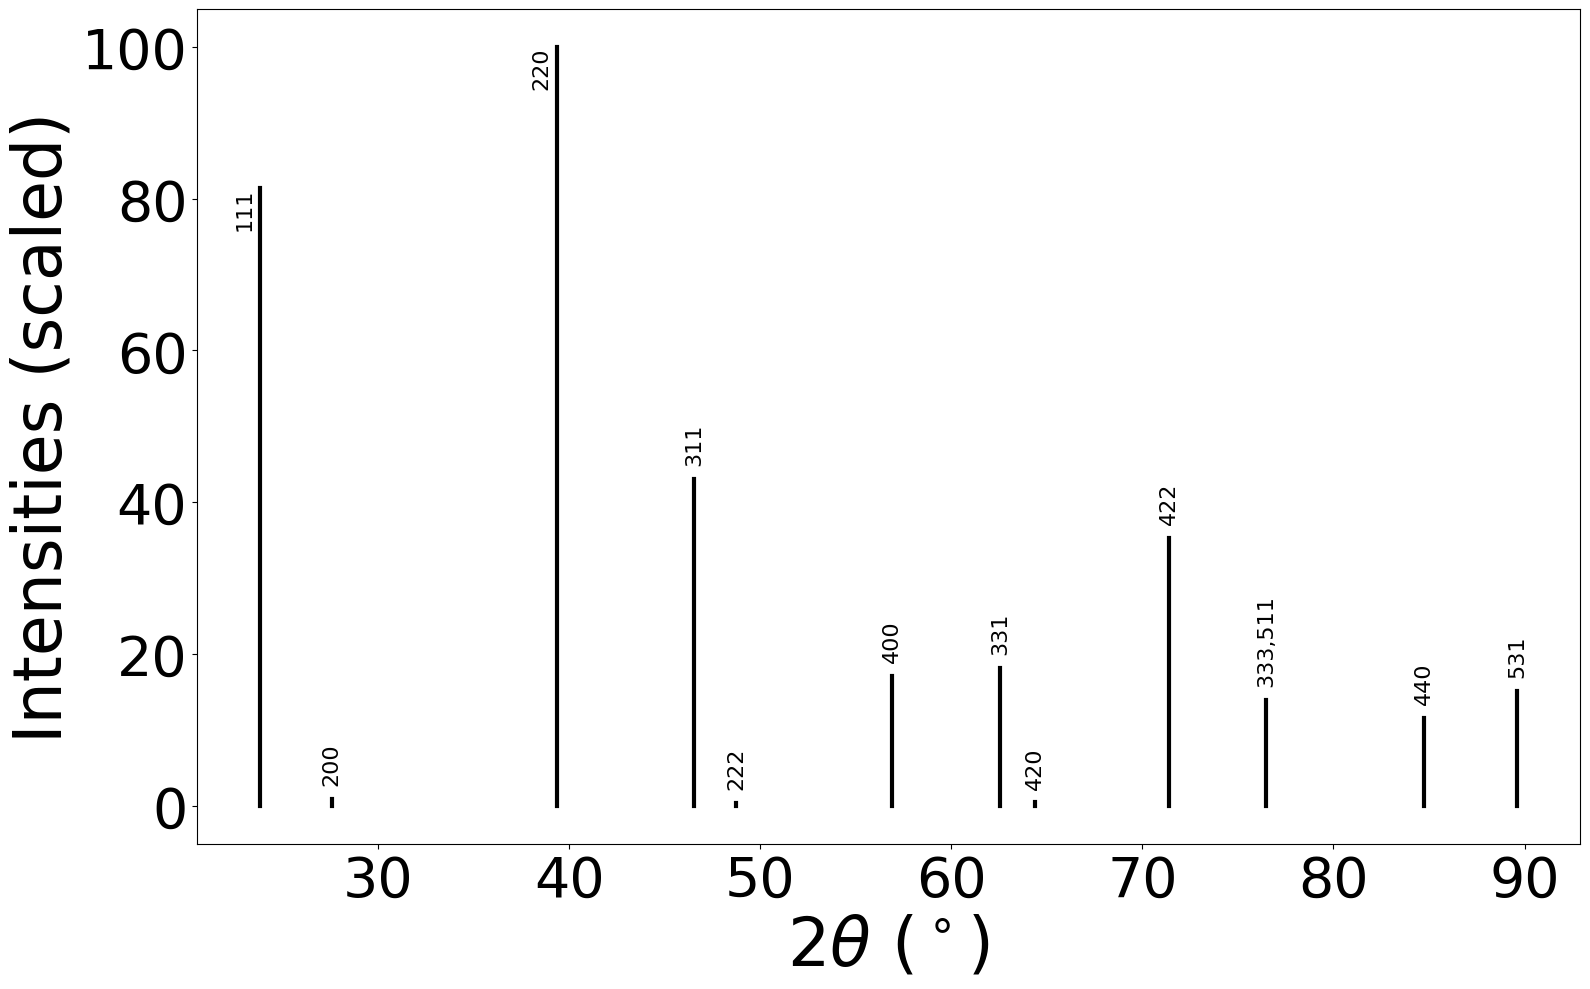

In [24]:
# Affiche le graphique du motif de diffraction
calculateur_xrd.get_plot(prim_struc)